# Imports

In [251]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict
import operator
import re

# Data Preprocessing

In [252]:
original_df = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', error_bad_lines=False)

/Users/paulfournier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [253]:
processed_df = original_df.copy()
#drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)

In [299]:
#Convert the numerical values in string type to integer type. 
def strToInt(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(strToInt)
processed_df['Aggression'] = processed_df['Aggression'].apply(strToInt)
processed_df['Agility'] = processed_df['Agility'].apply(strToInt)
processed_df['Balance'] = processed_df['Balance'].apply(strToInt)
processed_df['Ball control'] = processed_df['Ball control'].apply(strToInt)
processed_df['Composure'] = processed_df['Composure'].apply(strToInt)
processed_df['Crossing'] = processed_df['Crossing'].apply(strToInt)
processed_df['Curve'] = processed_df['Curve'].apply(strToInt)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(strToInt)
processed_df['Finishing'] = processed_df['Finishing'].apply(strToInt)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(strToInt)
processed_df['GK diving'] = processed_df['GK diving'].apply(strToInt)
processed_df['GK handling'] = processed_df['GK handling'].apply(strToInt)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(strToInt)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(strToInt)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(strToInt)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(strToInt)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(strToInt)
processed_df['Jumping'] = processed_df['Jumping'].apply(strToInt)
processed_df['Long passing'] = processed_df['Long passing'].apply(strToInt)
processed_df['Long shots'] = processed_df['Long shots'].apply(strToInt)
processed_df['Marking'] = processed_df['Marking'].apply(strToInt)
processed_df['Penalties'] = processed_df['Penalties'].apply(strToInt)
processed_df['Positioning'] = processed_df['Positioning'].apply(strToInt)
processed_df['Reactions'] = processed_df['Reactions'].apply(strToInt)
processed_df['Short passing'] = processed_df['Short passing'].apply(strToInt)
processed_df['Shot power'] = processed_df['Shot power'].apply(strToInt)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(strToInt)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(strToInt)
processed_df['Stamina'] = processed_df['Stamina'].apply(strToInt)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(strToInt)
processed_df['Strength'] = processed_df['Strength'].apply(strToInt)
processed_df['Vision'] = processed_df['Vision'].apply(strToInt)
processed_df['Volleys'] = processed_df['Volleys'].apply(strToInt)
processed_df['CAM'] = processed_df['CAM'].apply(strToInt)
processed_df['CB'] = processed_df['CB'].apply(strToInt)
processed_df['CDM'] = processed_df['CDM'].apply(strToInt)
processed_df['CF'] = processed_df['CF'].apply(strToInt)
processed_df['CM'] = processed_df['CM'].apply(strToInt)
processed_df['LAM'] = processed_df['LAM'].apply(strToInt)
processed_df['LB'] = processed_df['LB'].apply(strToInt)
processed_df['LCM'] = processed_df['LCM'].apply(strToInt)
processed_df['LDM'] = processed_df['LDM'].apply(strToInt)
processed_df['LF'] = processed_df['LF'].apply(strToInt)
processed_df['LM'] = processed_df['LM'].apply(strToInt)
processed_df['LS'] = processed_df['LS'].apply(strToInt)
processed_df['LW'] = processed_df['LW'].apply(strToInt)
processed_df['LWB'] = processed_df['LWB'].apply(strToInt)
processed_df['RAM'] = processed_df['RAM'].apply(strToInt)
processed_df['RB'] = processed_df['RB'].apply(strToInt)
processed_df['RCB'] = processed_df['RCB'].apply(strToInt)
processed_df['RCM'] = processed_df['RCM'].apply(strToInt)
processed_df['RDM'] = processed_df['RDM'].apply(strToInt)
processed_df['RF'] = processed_df['RF'].apply(strToInt)
processed_df['RM'] = processed_df['RM'].apply(strToInt)
processed_df['RS'] = processed_df['RS'].apply(strToInt)
processed_df['RW'] = processed_df['RW'].apply(strToInt)
processed_df['RWB'] = processed_df['RWB'].apply(strToInt)
processed_df['ST'] = processed_df['ST'].apply(strToInt)

In [255]:
#Convert wages and values to floats
def strToFloat(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value
        
processed_df['Value'] = processed_df['Value'].apply(strToFloat)
processed_df['Wage'] = processed_df['Wage'].apply(strToFloat)

In [256]:
processed_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

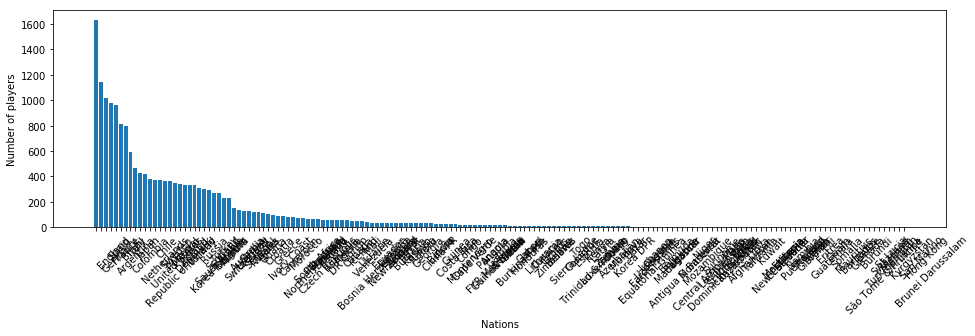

In [257]:
#Number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    #Count the players per country
    if (nation in nations):
        nations[nation] = nations[nation] + 1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)
sorted_nations = OrderedDict(sorted(nations.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_nations)), list(sorted_nations.values()))
plt.xticks(range(len(sorted_nations)), list(sorted_nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


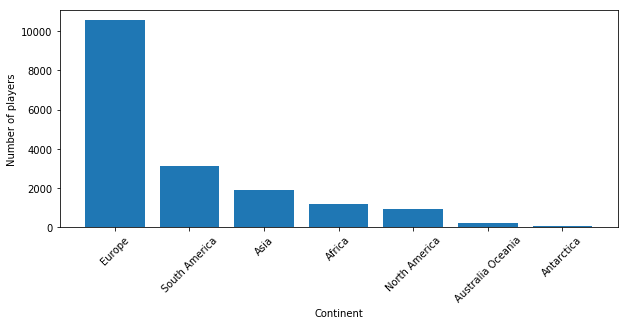

In [258]:
#Number of player per continent
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}
continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}

def count_continent(nation):
    #Count the players per continent
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)
sorted_continents = OrderedDict(sorted(continents.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_continents)), list(sorted_continents.values()))
plt.xticks(range(len(sorted_continents)), list(sorted_continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

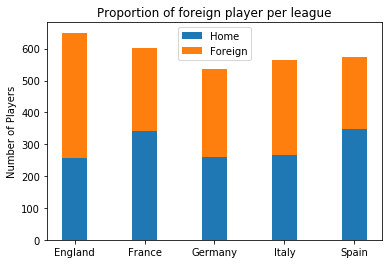

In [259]:
#Proportion of foreign player per league
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

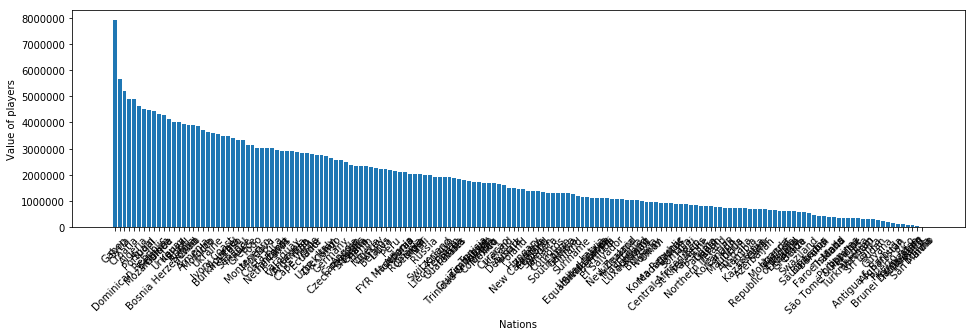

In [260]:
#Average player value per nation
value_per_nation = {'Nation': 0}
def sum_values(series):
    value = series[1]
    
    #Sum the player value per nation
    if (series[0] in value_per_nation):
        value_per_nation[series[0]] += value
    else:
        value_per_nation[series[0]] = value

nationality_value = processed_df[['Nationality', 'Value']]
nationality_value.apply(sum_values, 1)
value_per_nation.pop('Nation', None)

#Average the players value per nation
for nation in value_per_nation:
    value_per_nation[nation] = value_per_nation[nation] / float(nations[nation])

sorted_value_per_nation = OrderedDict(sorted(value_per_nation.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_value_per_nation)), list(sorted_value_per_nation.values()))
plt.xticks(range(len(sorted_value_per_nation)), list(sorted_value_per_nation.keys()), rotation = 45)
plt.xlabel('Nations')
plt.ylabel('Value of players')
plt.show()

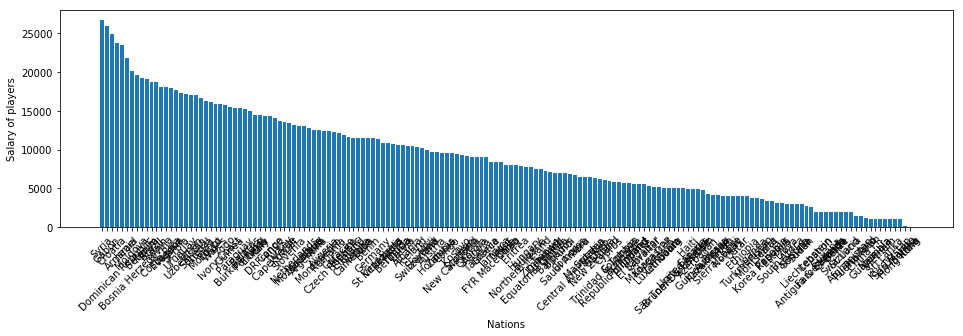

In [261]:
#Player salary per nation
salary_per_nation = {'Nation': 0}
def sum_salaries(series):
    salary = series[1]
    
    #Sum the player salary per nation
    if (series[0] in salary_per_nation):
        salary_per_nation[series[0]] += salary
    else:
        salary_per_nation[series[0]] = salary

nationality_salary = processed_df[['Nationality', 'Wage']]
nationality_salary.apply(sum_salaries, 1)
salary_per_nation.pop('Nation', None)

#Average the players salary per nation
for nation in value_per_nation:
    salary_per_nation[nation] = salary_per_nation[nation] / float(nations[nation])

sorted_salary_per_nation = OrderedDict(sorted(salary_per_nation.items(), key=lambda x: x[1], reverse=True))
    
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_salary_per_nation)), list(sorted_salary_per_nation.values()))
plt.xticks(range(len(sorted_salary_per_nation)), list(sorted_salary_per_nation.keys()), rotation = 45)
plt.xlabel('Nations')
plt.ylabel('Salary of players')
plt.show()

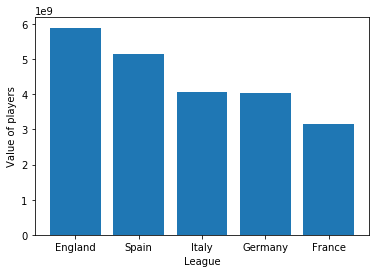

In [262]:
#Player value per league 
value_per_league = {'League': 0}
league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

def sum_values(series):
    value = series[1]

    #Count the players value per league
    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

#Average the players value per league
for league in value_per_league:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

sorted_league_value = OrderedDict(sorted(league_value.items(), key=lambda x: x[1], reverse=True))
    
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_league_value)), list(sorted_league_value.values()))
plt.xticks(range(len(sorted_league_value)), list(sorted_league_value.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

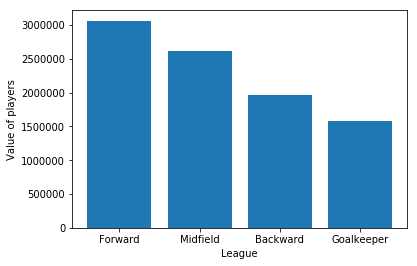

In [263]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0] #Array to avoid having repeated values in the average
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position category
for position in value_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

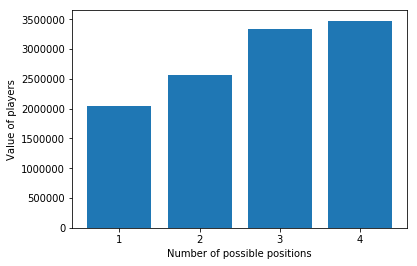

In [264]:
#Versatility and value
skill_versatility = {1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
average = {1: 0, 2: 0, 3: 0, 4: 0}

def sum_values(series):
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    skill_count = len(preferred_position_list)
    value = series[1]

    #Count the players per versatility
    if (skill_count in skill_versatility):
        skill_versatility[skill_count][0] += 1
        skill_versatility[skill_count][1] += value  
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position count
for count in skill_versatility:
    average[count] = skill_versatility[count][1] / skill_versatility[count][0]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average)), list(average.values()))
plt.xticks(range(len(average)), list(average.keys()))
plt.xlabel('Number of possible positions')
plt.ylabel('Value of players')
plt.show()

<Figure size 432x288 with 0 Axes>

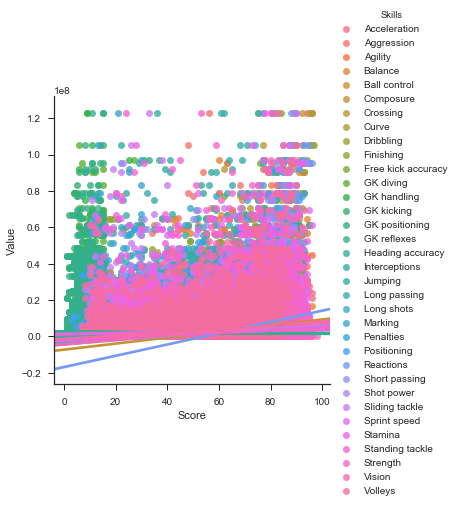

In [319]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
# sns.lmplot(x="skill", y="value", data=test, col="skill", hue="skill", col_wrap=5)
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', data=test)
plt.show()

<Figure size 432x288 with 0 Axes>

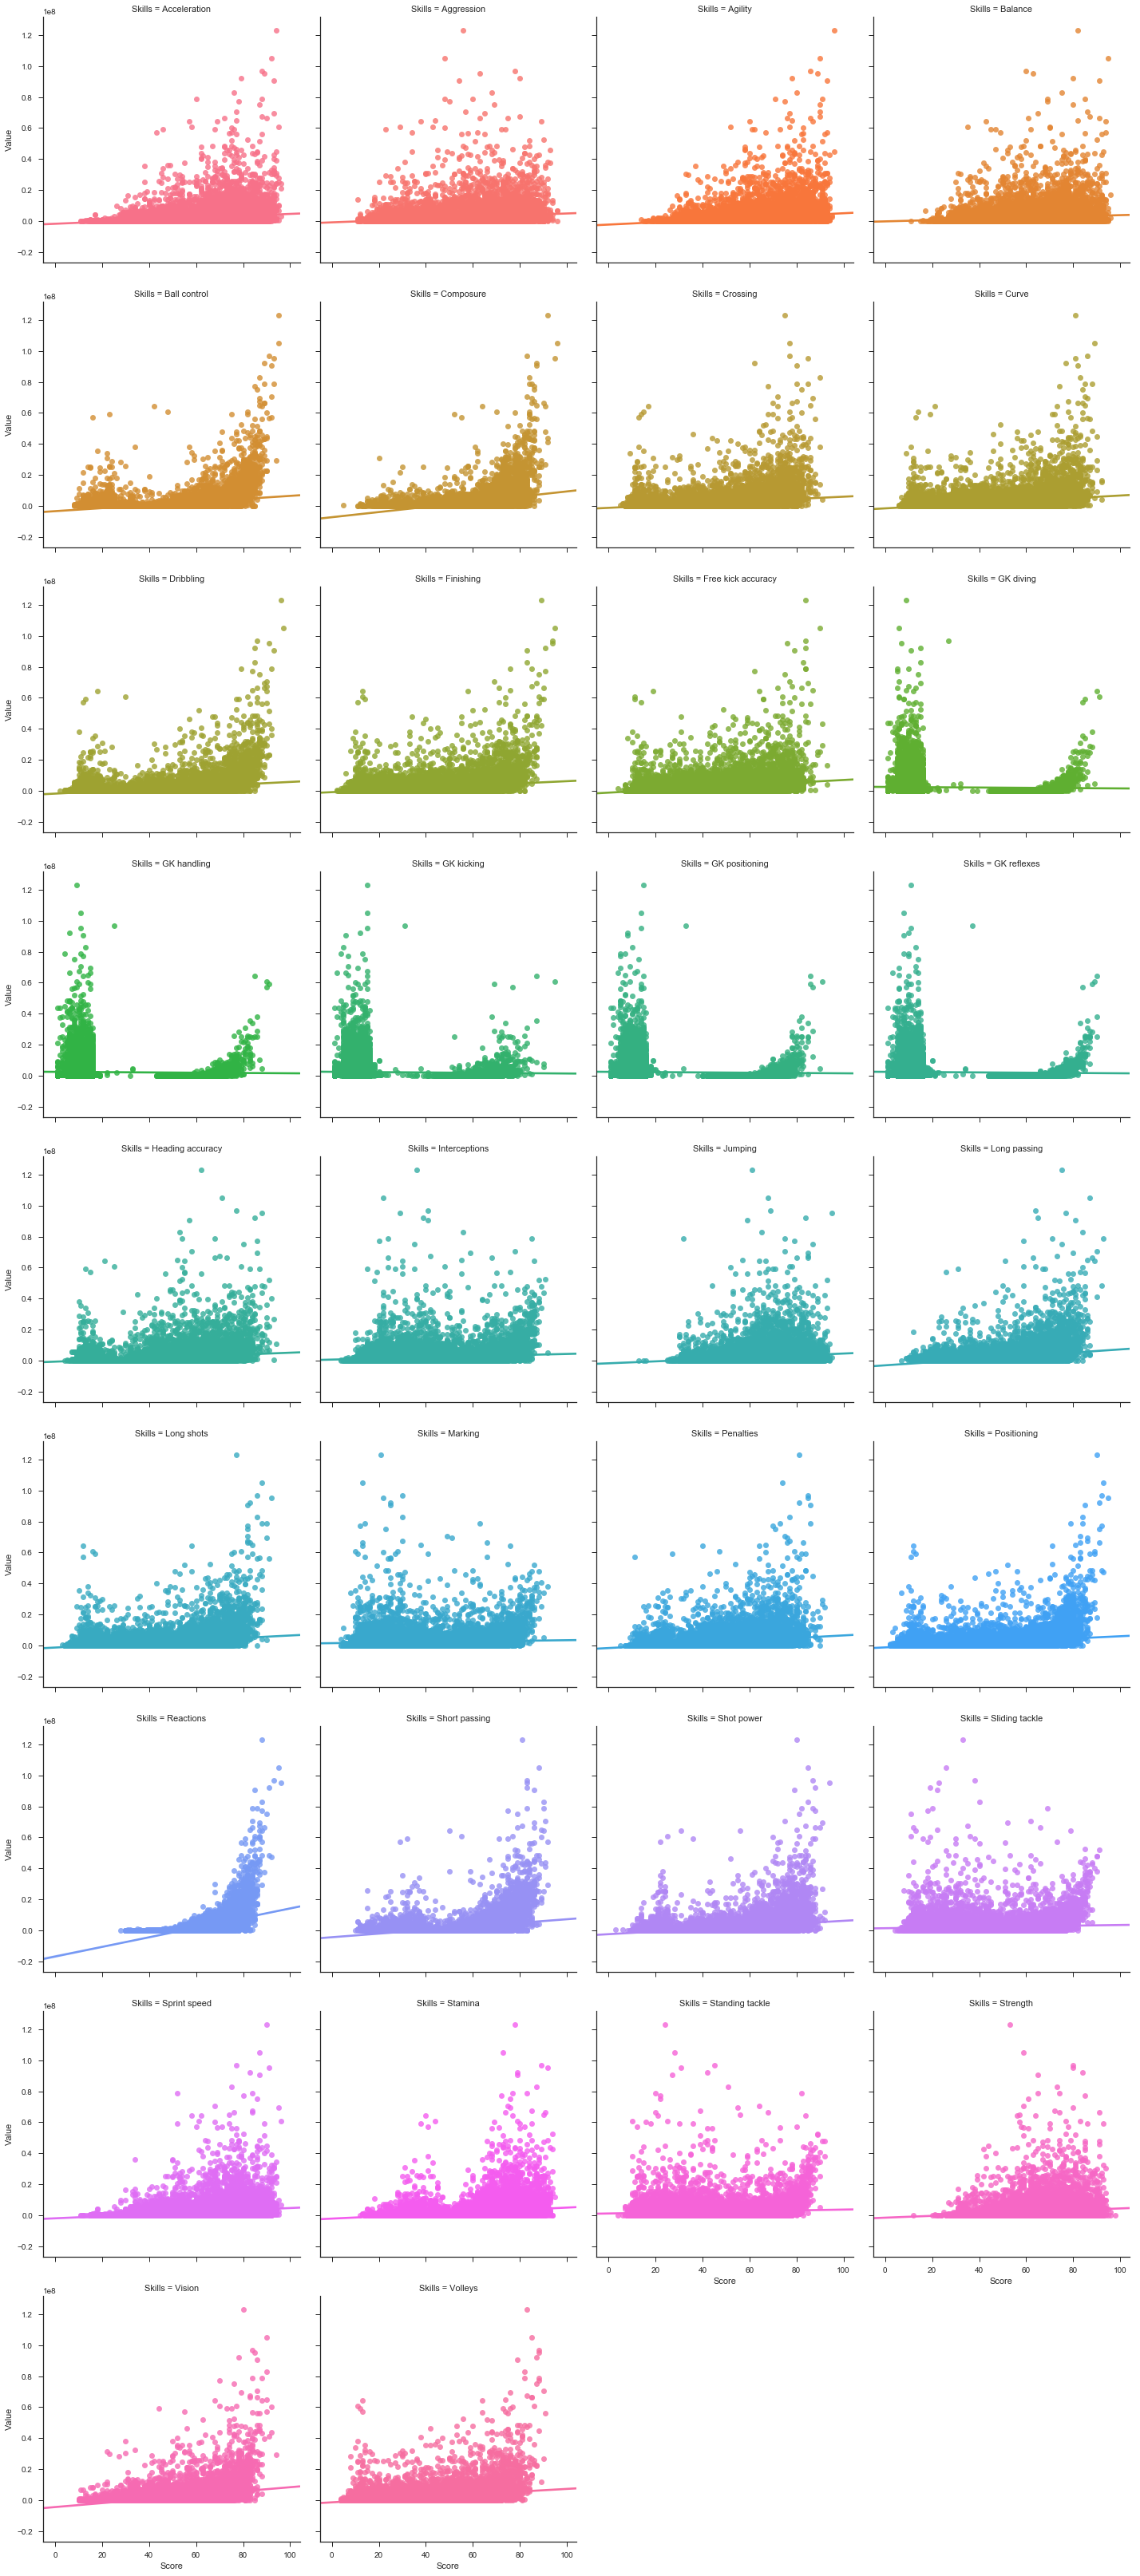

In [321]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
# sns.lmplot(x="skill", y="value", data=test, col="skill", hue="skill", col_wrap=5)
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', col="Skills", data=test, col_wrap=4)
plt.show()

In [312]:
#Potential and Value

In [268]:
#Age and value

In [269]:
#Age and potential

In [270]:
#Potential and country

In [271]:
#Potential and position

In [272]:
#Age and quality

In [273]:
#Team quality and potential

In [ ]:
#Correlation between salary and value